<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben: <br>
Pieplot, Heatmap, Pairplot</h1></center>

In [1]:
# Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL.ImagePalette import wedge
from matplotlib import color_sequences
from matplotlib.sphinxext.plot_directive import mark_plot_labels

# Aufgabe 1
Bilde folgende Heatmap nach:

![heatmap_bild](1_heatmap.png)


In [12]:
pengu = sns.load_dataset("penguins")
pengu_piv = pengu.pivot_table(
	index="species",
	columns="sex",
	values="body_mass_g",
	aggfunc="mean",
	observed=False,
)

pengu_piv

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In [8]:
sns.color_palette("coolwarm")

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

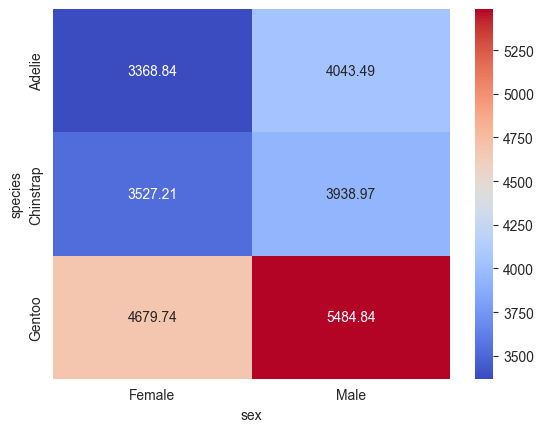

In [11]:
tips_heat = sns.heatmap(
	pengu_piv,
	annot=True,
	annot_kws={"fontsize": 10},
	fmt=".2f",
	cmap="coolwarm",
);

# Aufgabe 2
Bilde folgende Plots nach:

![pairplot_bild](2_pairplot.png)


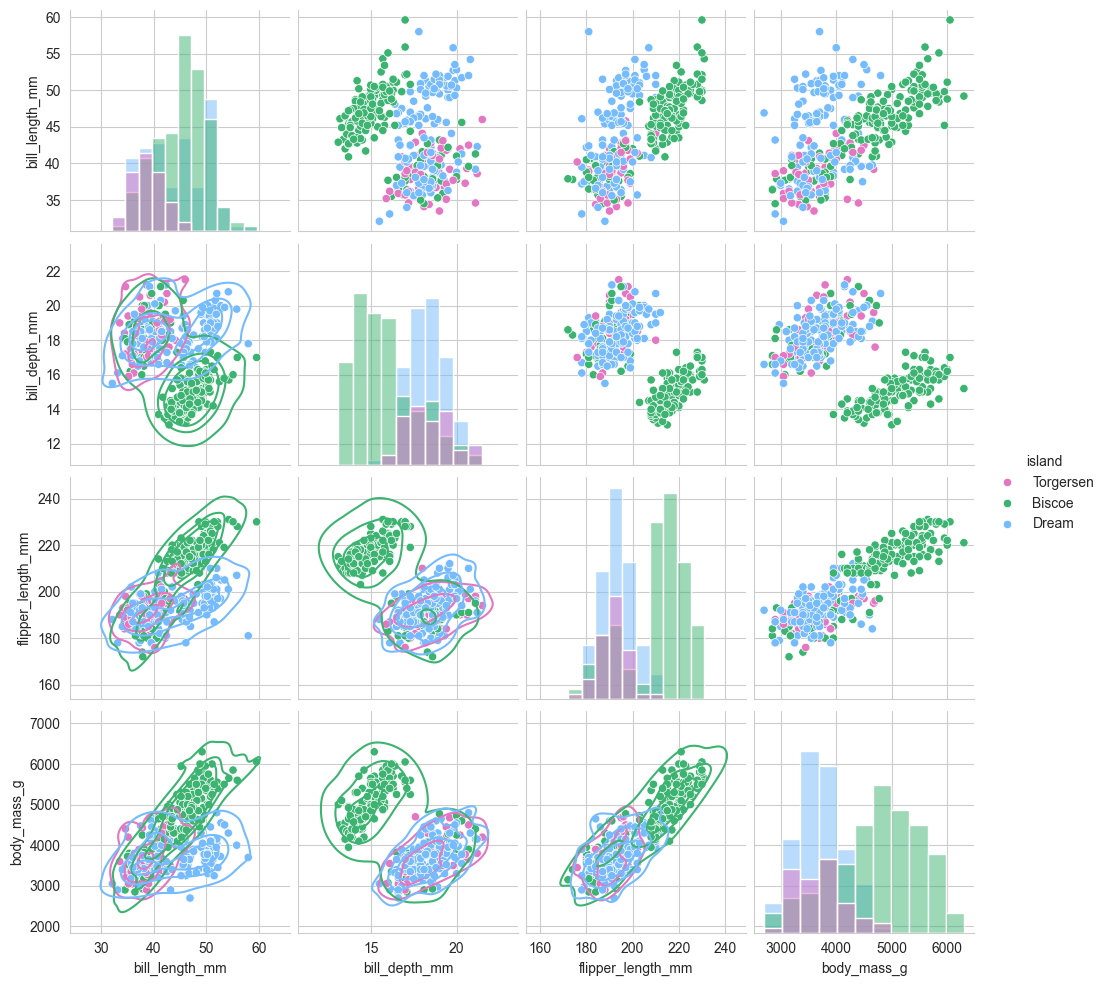

In [103]:
pengu_pairPlot = sns.pairplot(
	pengu,
	hue="island",
	diag_kind="hist",
	palette={"Torgersen": "tab:pink", "Biscoe": "mediumseagreen", "Dream": "xkcd:sky blue"}
)

pengu_pairPlot.map_lower(sns.kdeplot, levels=4);

# Aufgabe 3 - (optional und hart!)
Bilde folgenden Donut nach:

![donut_chart](3_donut_chart.png)


In [25]:
# group by species
# with amount of every species
island_group = pengu.groupby("island", observed=True) \
	.size() \
	.rename("count")

island_group

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [24]:
# group by island & species
# with amount of every species per island
island_species_group = pengu.groupby(["island", "species"], observed=True) \
	.size() \
	.reset_index(name="count")

island_species_group

,island,species,count
0,Biscoe,Adelie,44
1,Biscoe,Gentoo,124
2,Dream,Adelie,56
3,Dream,Chinstrap,68
4,Torgersen,Adelie,52


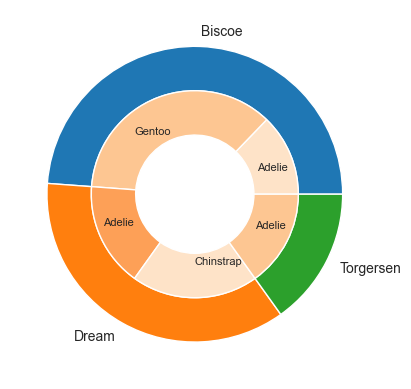

In [102]:
# subplots for donut chart
fig, ax = plt.subplots()
size = 0.3

# color settings
outer_colors = sns.color_palette("tab10", 3)
inner_colors = sns.color_palette("Oranges", 6)

ax.pie(
	island_group,
	wedgeprops={"width": size},
	colors=outer_colors,
	labels=island_group.index,
)

ax.pie(
	island_species_group["count"],
	radius=1 - size,
	wedgeprops={"width": size},
	colors=inner_colors[0:3],
	labels=island_species_group["species"],
	labeldistance=0.65,
	textprops={'fontsize': 8},
);

